# Zależność wystawionych ocen od odległości od lokali z tej samej grupy

In [7]:
%matplotlib inline
import json
import numpy as np
from collections import Counter
from funcs import haversine
import operator
import pandas as pd
import matplotlib.pyplot as plt

business_data = pd.read_csv('business_dataframe_all.csv',header=0, index_col=0)
del business_data['stars']

review_data = pd.read_csv('review_dataframe.csv',header=0, index_col=0)
review = pd.DataFrame(review_data,columns=['user_id','business_id','stars'])
users_list = np.array(review['user_id'])

In [10]:
k = 100
counter = dict(Counter(users_list))
counter = {k:v for k, v in counter.items() if v>1}

print(len(counter.keys()))
users_counter = list(counter.keys())
# some_users = np.random.choice(users_list, k, replace=False)
some_users = np.random.choice(good_users, k, replace=False)

print(len(some_users))


778655
100


In [11]:
s = 0
plot_data = []
for u in range(len(some_users)):
    user_data = review.loc[review['user_id'] == some_users[u]]
    result = pd.merge(user_data, business_data, on='business_id')
    if(len(result)<1):
        continue
    local_labels = result['class'].value_counts()
    groups = {k:v for k, v in local_labels.items() if v>1}
    business_classes = list(groups.keys())
    for c in business_classes:
        business_list =  list(result.loc[result['class'] == c]['business_id'])
        if(len(business_list)<2):
            continue
        dist_ratings = []
        for i in range(len(business_list)):
            b1 = result.loc[result['business_id'] == business_list[i]]
            for j in range(i+1,len(business_list)):
                b2 = result.loc[result['business_id'] == business_list[j]]
                dist = haversine(b1['latitude'].values[0],b1['longitude'].values[0], b2['latitude'].values[0],b2['longitude'].values[0])
                if(dist <= 2):
                    ratings = abs(b1['stars'].values[0] - b2['stars'].values[0])
                    dist_ratings.append((dist,ratings))
        if(len(dist_ratings)<2):
            continue
        dist_ratings = sorted(dist_ratings, key=lambda x: x[0])
        plot_data.append(dist_ratings)
        print(dist_ratings)


[(0.0, 0.0), (0.9271940162398468, 1.0), (0.9271940162398468, 1.0)]
[(0.0, 1.0), (0.0, 1.0), (0.0, 0.0)]
[(0.5689793555444725, 1.0), (1.1996208973542315, 1.0), (1.3190949424187453, 2.0)]
[(1.101134676984568, 0.0), (1.5098781048836822, 0.0), (1.590690142663562, 1.0)]
[(0.059274103001142844, 1.0), (1.152977757025711, 1.0), (1.2106203582123785, 0.0)]
[(0.14197338972700818, 0.0), (1.5077090506129944, 2.0)]
[(0.018770618431736514, 1.0), (0.1833130374648473, 1.0), (0.2016907300714534, 2.0)]
[(0.0, 0.0), (1.4376265820139296, 0.0), (1.8029315256220078, 1.0), (1.8029315256220078, 1.0)]
[(0.5361991695118185, 1.0), (0.8330190696785748, 1.0), (1.301572798035032, 2.0)]
[(1.0795178432146617, 1.0), (1.12043267490774, 2.0)]
[(0.9455304049892397, 0.0), (1.4587660549949837, 0.0)]
[(0.4343455335421646, 1.0), (1.5752453322694568, 0.0)]
[(0.11178103144399022, 2.0), (1.6453761830536167, 2.0), (1.6853932551898083, 0.0)]
[(0.24913505782719436, 0.0), (1.0427136566936777, 1.0), (1.1320271624601497, 1.0)]
[(0.0, 

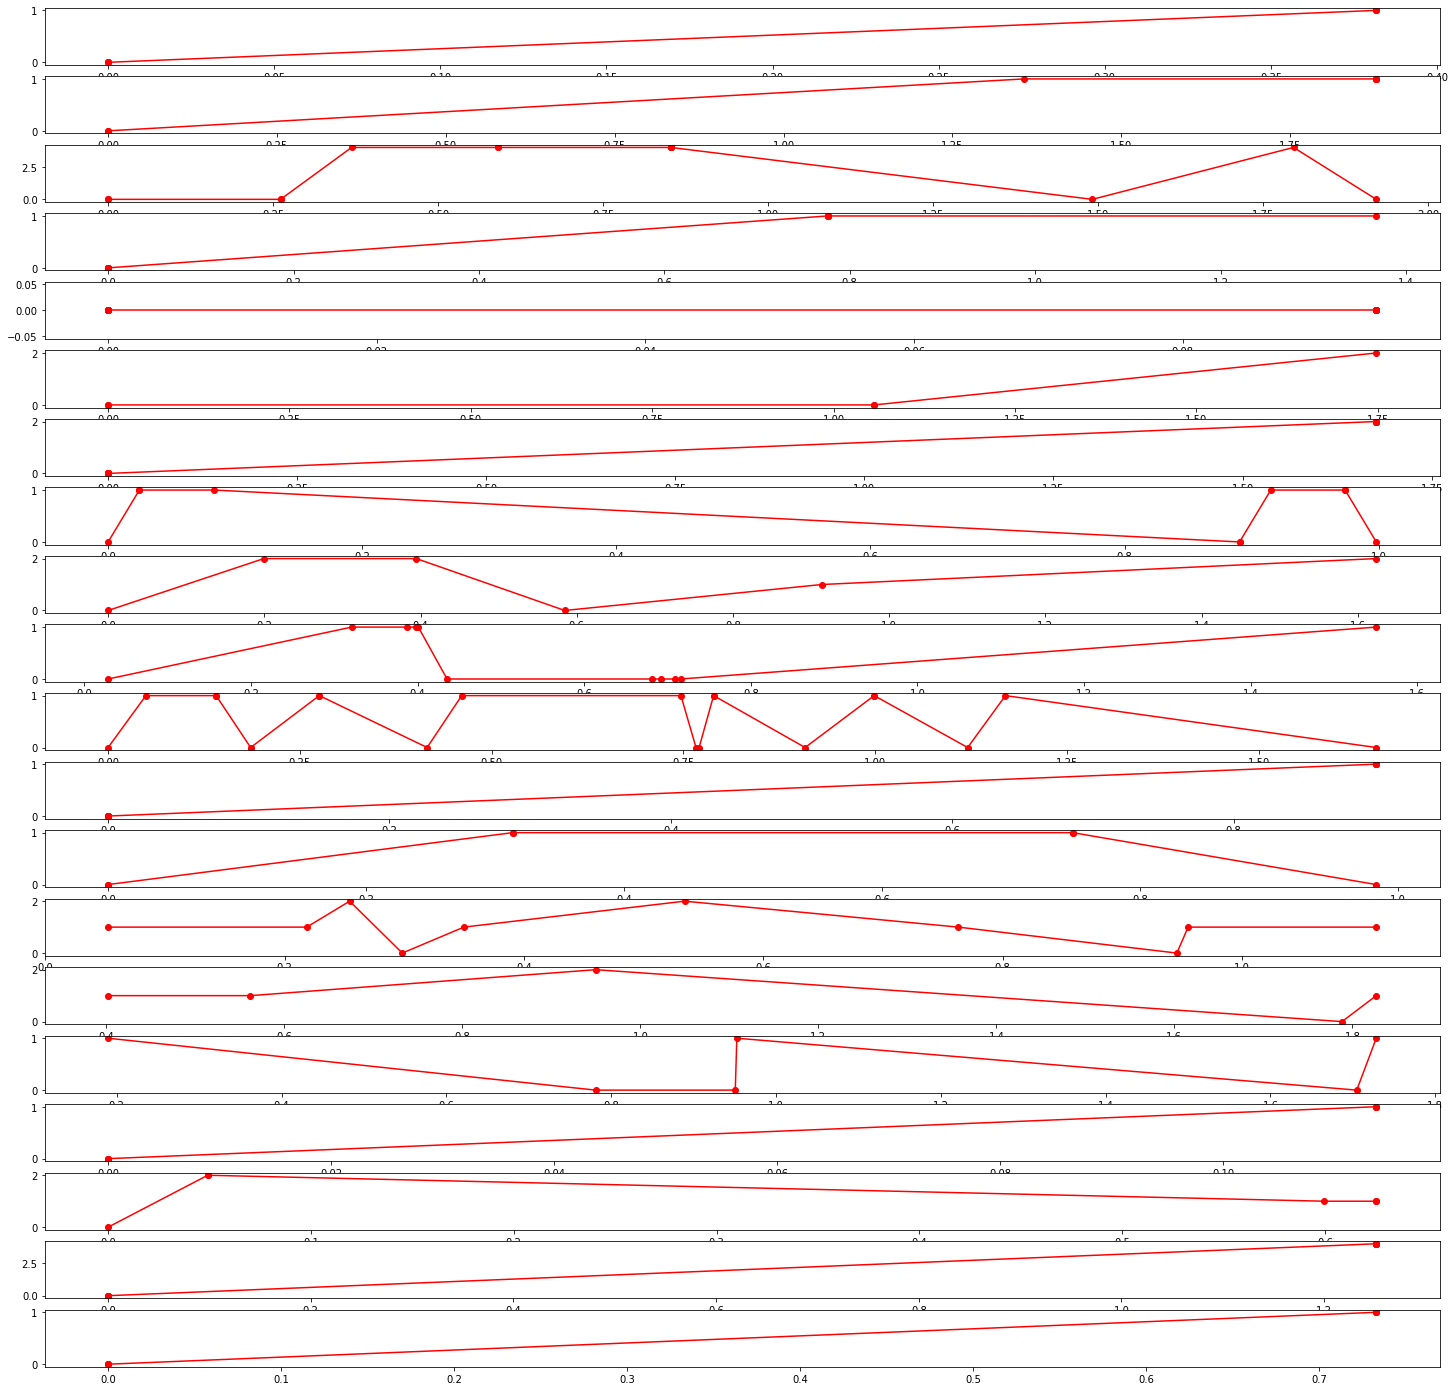

In [12]:
l = 0
for dist_ratings in plot_data:
    if(len(dist_ratings)>4):
        l+=1
fig, axs = plt.subplots(l,figsize=(25,25)) 
s = 0
for dist_ratings in plot_data:
#     print(dist_ratings)
    if(len(dist_ratings)>4):
        x = [i for i,j in dist_ratings]
        y = [j for i,j in dist_ratings]
        axs[s].plot(x,y,'ro-')
        s+=1
        
Wszyscy użytkownicy na jednym wykresie
Jeden wykres - jedna grupa

In [13]:
# l = 0
# for dist_ratings in plot_data:
#     if(len(dist_ratings)>4):
#         l+=1
fig, axs = plt.subplots(10,figsize=(25,25)) 
s = 0
for dist_ratings in plot_data:
#     print(dist_ratings)
    if(len(dist_ratings)>4):
        x = [i for i,j in dist_ratings]
        y = [j for i,j in dist_ratings]
        axs[s].plot(x,y,'ro-')
        s+=1
        

IndexError: index 10 is out of bounds for axis 0 with size 10

In [9]:
good_users = []
for u in range(int(len(users_counter)/500)):
    user_data = review.loc[review['user_id'] == users_counter[u]]
    result = pd.merge(user_data, business_data, on='business_id')
    if(len(result)<1):
        continue
#     print(result['class'].value_counts())
    local_labels = result['class'].value_counts()
#     print(local_labels.head())
    groups = {k:v for k, v in local_labels.items() if v>1}
#     print(list(groups.keys()))
    business_classes = list(groups.keys())
    for c in business_classes:
#         print(c)
        business_list =  list(result.loc[result['class'] == c]['business_id'])
#         print(business_list)
        if(len(business_list)<3):
            continue
    good_users.append(users_counter[u])
    print("User:",users_counter[u])


User: hG7b0MtEbXx5QzbzE6C_VA
User: yXQM5uF2jS6es16SJzNHfg
User: jlu4CztcSxrKx56ba1a5AQ
User: d6xvYpyzcfbF_AZ8vMB7QA
User: nMeCE5-xsdleyxYuNZ_7rA
User: FIk4lQQu1eTe2EpzQ4xhBA
User: TpyOT5E16YASd7EWjLQlrw
User: NJlxGtouq06hhC7sS2ECYw
User: JSrP-dUmLlwZiI7Dp3PQ2A
User: 6Fz_nus_OG4gar721OKgZA
User: _N7Ndn29bpll_961oPeEfw
User: DzZ7piLBF-WsJxqosfJgtA
User: 3CJUJILq7CLHk_9OrvpvQg
User: 8NwU4TRsD3S6gIfBqFzDMQ
User: vXZeHaLvdfCPATz5BDavow
User: vDr8hBNYigiY70fk1kF5iQ
User: C_hUvw2z0R-Rv0yZb6QCZA
User: 1fi6x4tnJtlVWaJmoIO9XA
User: tFICmdLtwgFIRcwtlbYQOg
User: uFVAAe0JC81IPmxgT49Hcw
User: DbccYu3OppWKl21OanZnTg
User: en0xQXlvRk-ZtKlaW4I8eQ
User: fxrQSMhHlBv6eJVRdchG9Q
User: wNyiw6GfVfn5Kphqmux1gw
User: tAcB1ZohRtjozsymvqqHzQ
User: ITSnuLOu81doC5GGT5NMSQ
User: zFYFuufYWQSPj0r5lrKQKg
User: SvMGr_Oih7ivtzmnCL-Tmg
User: D-vYE3HILl7Qk1UhYqZXYQ
User: jAVtSgE5L-Dt6_I5FIiVGA
User: 8vIK6ndl8yzIdmSDnGp0tw
User: vVhE4lGdsGK5rQgBfOGFxA
User: 0nTJWagRU8_-KS1x7Zw5Yw
User: POr1NTWV45OaNCOLfb47fw
User: 0FMte0z-

User: 0-fZISHcPAKveUyZY1SLLg
User: AkAlqMww2j2moYWEQuz08A
User: TQSLNRAtiXj1zyLZ3OAVrw
User: yuSlyEkV1vH1htZN0aOF0Q
User: Y9Feqi0voIL4mreMFcmNkg
User: -XZYHHQFQ0z5yfB0K3_40Q
User: h9y55WNNg7SYg3kQwzTMmQ
User: ofKDkJKXSKZXu5xJNGiiBQ
User: I3ntg4EScSEbngZ6JdDubw
User: eM1cff4mZXlFxuEzMYi3lw
User: WxwBaCUHlIeGuux6acCQBA
User: TdOoNMumDGROn_WInq1qgg
User: HHik5ySbG22nCBKuUNrmqA
User: 09mlR7BwKg_eLODpazevng
User: 1ZjuM2un9ZLx04zLfCG7ig
User: mkaGi9drcXLg-YZe7JYaWw
User: UWuQStTz8vbB3Mgjop1xhA
User: gi0Y_kIFI3F_9XW6bUjrSQ
User: -00MbjbaOISrcuV7jOVRIg
User: ySYy230BGNe7Aa7ayAJiJQ
User: P3B7FfBpXERa-KdxwIGkHA
User: ZNrXz8ylmhGQik61JhX4Ew
User: ETWISuSphgjc3puFAplnJg
User: 6rGVoAI0Bl8ZEbMNJWOK3w
User: LBQF_NkO5hdQZlG7xCsXMA
User: -A5-wpgS-WR3OmMN1-1eKQ
User: nkSf1NKWFGiAyrnCa-A5UA
User: M9jjjTEi5-4J_TTcbGPXaQ
User: tR61gp6Kan5HCVmqtYsFzg
User: fOHvV2iqEcKglYKEmPnsqw
User: XB-J13-Cd8JK65DLH-664g
User: NgavU49JWmusG2BjfqNdaw
User: 206GEBKYDmRp2dygw3rTKw
User: 3Uv0dGI2IXJb2OUj8R2GJA
User: RM_KDxow

User: xZaDDTBqSTRtAZJXtiOiEA
User: 2zOXdbLjhFkcXSqpyhYBnQ
User: tbMUSG5ZWlNMU_ELUhsSGQ
User: ZLM43lnHg_0e89NkN7PdTA
User: wAYR3oO-JM8yVVTMw23QgQ
User: O4czYQiczEiThD35wOlgHA
User: xFSLb_pxXta5G4oaRB1ylQ
User: AIFUdk4s8xvC1uaHCW8qFA
User: WMMI5Q4Rmm1Rqdu0jOvyhQ
User: gJqA7_K6ORYVgLohUD6tnA
User: 8gYdZVFSA94HopPEim4lFg
User: dcgzh-3j42cgvGVtGCiW9g
User: SaLLBWOqxomnAoivv5YwqA
User: bLEu0SMmMMT6s-46wV7yqQ
User: 1ifi_ScTbh8ECqv-lu8-iw
User: EzKbEYjajd0NvoJ3XC9VhQ
User: GdqPyjhdy4cr03ZJ76m-pA
User: D9m4JQ7bM-or5sw54L5Dhg
User: PXTQbutMBgBIbB_Rabn53g
User: qlC607Cyp0Mj91vDFvkp3Q
User: iyBXlsTvcvJly0GhFWapWA
User: a0WsTTJAEqsZ4oNNIVn_lA
User: 29PE0SAW30CVFNEIs3WwTg
User: cBrXXLUvACzsI4Y02x9cJw
User: StZTVDuFzahNvjl5qu6l7Q
User: mEzc6LeTNiQgIVsq3poMbg
User: TFwEPg83Q2w-aDCtdiVrFw
User: cKsTG841LaXVQoTf01zWTQ
User: -9da1xk7zgnnfO1uTVYGkA
User: ME1yRzbc_uH7WZ2KfJuMFw
User: lK_32lYJ-p_fjc01G-DPLw
User: jsTvQ4F_xozD_pe-UkS1GQ
User: sEu8kAMQUmQGPr2-fDzyvQ
User: 7btsXeA7PGFpuBs9-xxhyw
User: GoARWqay

User: FoR5vEV7NrtOsSe27JDdYg
User: zgV0ZroIF956gw4cul8MHA
User: 8NPPCBA8S5ABAQQENEqk0A
User: KnkiyXZDt8hVdq_kw1iWuw
User: iCkgHkZZIcSGK5yIxAZhGg
User: vjX7lrAJx09oy7SZH078dw
User: fFFTeVrZfTWuvbJXNKb-vQ
User: FiHqlPU0_zRoNdRsoGVbZg
User: UiHd7ZFJ6bDkBPgCABHNxA
User: 0QUHQ848J-hM043cefpXdQ
User: yBdgmfxqt2RfZIkk24Z6jA
User: VMNt8vQrzWL6taFm7tlKWw
User: E8xjLfGu81Z7jiouYJYVsg
User: KlH-uX3TBG9V0Z3Bk6ShUg
User: jAkoFeESpAWmA1AIUtYFrw
User: XMZKOrLE5b-alqG3We605g
User: p08KxXZQ1cGU0GgbASSmSg
User: fyyIwRB7YSiJBSFsmZVnEQ
User: I2qJvA0tbGdZJ3XrwzwfzA
User: 9AMd4KYQIu-De1Zu6mVU0Q
User: 139hD7gkZVzSvSzDPwhNNw
User: 93arRxjGiv2VwrD52neeYg
User: VaOGFRkItjT3r3njUmbeog
User: rcMhH7U_OnlVOSi2T1qtqA
User: _5K86aIhkTbSjeDFG8VE3w
User: HLVmrjOsgdJ48Hqu0BaWBA
User: a6edJQpI-MEg-OUTKDp3HA
User: swDwGOEkjVJtDOgO5UU8bg
User: f_6ZjA4KhYXYDmbIzEVzyw
User: J4p05ZTg-av3PtiC_D09Dw
User: 9NG8l_nND_vcg0g6JRuUew
User: QrHAOWGkahT2nmvwcHt56w
User: O5L8zuI27psWhlXYH2lsdQ
User: 1CqkFliipv_X15WYn5aPfg
User: FoSus9RX

User: gE1_4oTTYlA6O0cP3gyneA
User: ks93YCFTmyjjdo-UD24xNQ
User: Y-qbpumFHhpiT7BLK2yGXg
User: -Yz2wIcsdJxUOFMbTgoKQA
User: h3q7CXdmUX5cisXHk3dkHQ
User: AbVdT3VAgGKhaH7XTi8iew
User: Wxd-EKF2Z4RHZUmwQ6Eeew
User: ZPbtHU-djOdX--dRCX-xSQ
User: 8oiVnEsjQdr48xKQ9kbuug
User: 1udIBVPPWCAcA68fWdBOgg
User: XHILHzYk1zK-Ay66j6gcZQ
User: NuNOtd32kKrwjtRG7vkTaw
User: Vx9pXGVpyGTa_vObAr_BhA
User: vhk3QZEg_wMx5s9hru24aQ
User: fwasfCCwbxLjxLNhYLuF3Q
User: mMp1Gy28MEsZgZzGAo7diw
User: ZiKn1T5Hy6bxwV_fCkjQbw
User: WXlxViTwXHPBvhioljN9PQ
User: tCWf4IGrXoLNcvxBnbW1qg
User: 8bA8g2Kn-tcNvaogh7LV7A
User: UBs-A1IL9eB8jg-HXgPWcA
User: bLQ_GA6Zgp1i60FjENisMQ
User: YctO-3Q0c91lSQwlv9ngiw
User: hBjIZFUXyP_toUSlqMjpIQ
User: cgRKSmpD7dEWREKI_jZriw
User: cE3XnP2WHGT1OxQtBdT5Hw
User: aHRyjxQdJKpfzkY95NADDw
User: l40uVPN5xIkOxop3eBEHjw
User: v2ViI9TneBnDZaQpqb4IAQ
User: e9Zjb9PK3frNwOiVYROZHQ
User: wfAWYQh1axhh9XAfeJfAYw
User: 4OB83KHfJ8y13mmxCiyJrg
User: NxOkZBPjxJ-xhCXcWP6ijw
User: t4giwVvEu2yjHUELQUlCMw
User: iLAganz9

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [5]:
import json
with open('wyniki/distances2.json', 'r') as f:
    data = json.load(f)

In [54]:
i = 26
while True:
    if(len(data[i]['x'])>100):
        print (i)
        break
    else:
        i+=1

29


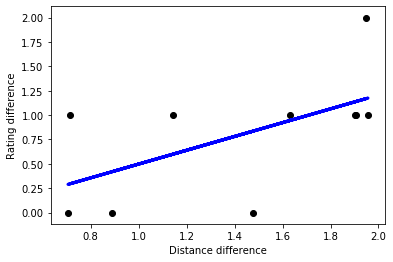

In [53]:
x = []
y = []
d = data[1]
for i in range(len(d['x'])):
    if(d['x'][i]>0 or d['y'][i]>0):
        x.append(d['x'][i])
        y.append(d['y'][i])
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x, y)

# Make predictions using the testing set
y_pred = regr.predict(x)

plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)

plt.xlabel("Distance difference")
plt.ylabel("Rating difference")

plt.show()

In [65]:
x = []
y = []
d = data[3]
for i in range(len(d['x'])):
    if(d['x'][i]>0 or d['y'][i]>0):
        x.append(d['x'][i])
        y.append(d['y'][i])
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
regr = linear_model.LinearRegression()
regr.fit(x, y)
y_pred = regr.predict(x)
print(regr.coef_)

plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)

plt.xlabel("Distance difference")
plt.ylabel("Rating difference")

plt.show()

[[0.27449511]]


[[-2.79237486]]


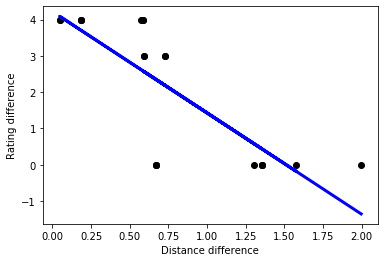

In [64]:
x = []
y = []
d = data[25]
for i in range(len(d['x'])):
    if(d['x'][i]>0 or d['y'][i]>0):
        x.append(d['x'][i])
        y.append(d['y'][i])
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
regr = linear_model.LinearRegression()
regr.fit(x, y)
y_pred = regr.predict(x)
print(regr.coef_)

plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)

plt.xlabel("Distance difference")
plt.ylabel("Rating difference")

plt.show()

[[-0.31179055]]


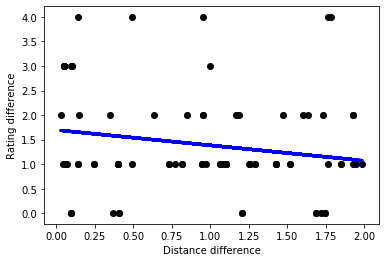

In [63]:
x = []
y = []
d = data[29]
for i in range(len(d['x'])):
    if(d['x'][i]>0 or d['y'][i]>0):
        x.append(d['x'][i])
        y.append(d['y'][i])
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
regr = linear_model.LinearRegression()
regr.fit(x, y)
y_pred = regr.predict(x)
print(regr.coef_)

plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)

plt.xlabel("Distance difference")
plt.ylabel("Rating difference")

plt.show()

In [71]:
up = 0;
down = 0
d = data[29]
for i in range (len(data)):
    d = data[i]
    x = []
    y = []
    for i in range(len(d['x'])):
        if(d['x'][i]>0 or d['y'][i]>0):
            x.append(d['x'][i])
            y.append(d['y'][i])
    if(len(x)<2):
        continue
    x = np.array(x).reshape(-1,1)
    y = np.array(y).reshape(-1,1)
    regr = linear_model.LinearRegression()
    regr.fit(x, y)
    y_pred = regr.predict(x)
#     print(regr.coef_)
    if(regr.coef_>0):
        up+=1
    if(regr.coef_<0):
        down+=1    
        
print("UP: ",up,", DOWN: ", down)

UP:  7187 , DOWN:  7366


In [22]:
import json
with open('wyniki/distances_categories_all_old.json', 'r') as f:
    data = json.load(f)

In [23]:
print(data[0])
print(len(data[0]['Shopping_x']))
print(len(data[0]['Restaurants_x']))
print(len(data[0]['Services_x']))
print(len(data[0]['EducationNEntertainment_x']))

{'user': '2U5VJvQ17FtB0wAmpaMowA', 'Restaurants_x': [1.8824, 0.2396, 0.9528, 0.1239, 0.9421, 0.5119, 1.1466, 1.0206, 1.7196, 0.9402, 0.9242, 0.0321, 0.6297, 0.3503, 0.6323, 0.2281, 1.7544, 0.2283, 1.1609, 1.1875, 0.1019, 1.8689, 1.8713, 1.0484, 0.3395, 0.1483, 0.1998, 0.8537, 1.5177, 0.2543, 0.7327, 1.8427, 0.4062, 0.5377, 0.5288, 1.8197, 0.5312, 0.4171, 1.0833, 1.5945, 1.6398, 1.4341, 0.8057, 0.8057, 1.643, 1.7063, 1.9688, 0.1914, 0.935, 1.4148, 0.1262, 1.9195, 0.821, 1.9581, 0.866, 0.8983, 1.8501, 1.7986, 0.1275, 0.207, 1.0661, 1.0532, 1.3326, 0.1789, 0.9314, 1.1955, 1.7648, 0.732, 1.7649, 1.9809, 1.8725, 1.8725, 1.06, 0.1273, 1.9708, 1.0087, 1.5441, 1.2118, 1.2889, 0.9907, 1.1234, 1.4341, 0.9176, 0.5675, 0.8858, 1.364, 1.364, 1.4999, 1.8892, 1.966, 0.9468, 1.825, 0.6054, 1.808, 1.2999, 1.5686, 0.4362, 0.9191, 1.2188, 0.0, 0.8642, 0.8642], 'Restaurants_y': [1.0, 0.0, 1.0, 3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0

In [27]:
d = data[0]
for i in range (len(data)):
    x = []
    y = []
    for i in range(len(d['Restaurants_x'])):
        if(d['Restaurants_x'][i]>0 or d['Restaurants_y'][i]>0):
            x.append(d['Restaurants_x'][i])
            y.append(d['Restaurants_y'][i])
    if(len(x)<2):
        continue
print(len(x))
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
regr = linear_model.LinearRegression()
regr.fit(x, y)
y_pred = regr.predict(x)
print(regr.coef_)

plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)

plt.xlabel("Distance difference")
plt.ylabel("Rating difference")

plt.show()

101
[[-0.2570014]]


In [20]:
d = data[0]
for i in range (len(data)):
    x = []
    y = []
    for i in range(102,111):
        if(d['Shopping_x'][i]>0 or d['Shopping_y'][i]>0):
            x.append(d['Shopping_x'][i])
            y.append(d['Shopping_y'][i])
    if(len(x)<2):
        continue

x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
regr = linear_model.LinearRegression()
regr.fit(x, y)
y_pred = regr.predict(x)
print(regr.coef_)

plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)

plt.xlabel("Distance difference")
plt.ylabel("Rating difference")

plt.show()

[[-0.25139568]]
